# Create Potential SNIIP List

Author: Melissa Graham & Midori Rollins

Identify potential type IIP supernovae from the "good" candidates created for all of the DDF.

To do this, we constrain the time spans and decline rate

 * Long timespan (100 days or more) in every filter.
 * Maintains same brightness for 100 days before declining


Write the list of potential SNIIP to `potential_sniip_list.txt`.

Save the plot of every potential SNIa lightcurve in the folder `all_potential_sniip_plots/`.

## Set up and read in data

In [186]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

In [187]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

In [188]:
all_filters = ['g', 'r', 'i']
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']
sym = ['o', 's', '^', 'o', 's', '^']
siz = [5, 5, 7, 5, 5, 7]

In [4]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

In [5]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

In [69]:
fnm = '../SNIIP/sn2015V.dat'

sn2015V_mjd = np.loadtxt( fnm, dtype='float', usecols=(0) )
sn2015V_mag = np.loadtxt( fnm, dtype='float', usecols=(1) )
sn2015V_mage = np.loadtxt( fnm, dtype='float', usecols=(2) )
sn2015V_filter = np.loadtxt( fnm, dtype='str', usecols=(4) )

del fnm

## Identify potential SNe IIP


In [167]:
%%time
gslope = []
rslope = []
islope = []
gdecline_time = []
rdecline_time = []
idecline_time = []
for i in range(len(paramLC_candid)):
    gtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g')))[0]
    if len(gtx) > 1: 
        gtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mag ==candLC_mag[gtx].min()))[0]
    gmin_date = np.unique(candLC_mjd[gtx2])[0]
    gtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'g') & (candLC_mjd >= gmin_date))[0]
    if len(candLC_mag[gtx3]) > 1:
        gdecline_mag = candLC_mag[gtx3[-1]] - candLC_mag[gtx3[0]]
        gdecline_t = candLC_mjd[gtx3[-1]] - candLC_mjd[gtx3[0]]
        gdecline_time.append(candLC_mjd[gtx3[-1]] - candLC_mjd[gtx3[0]])
        gslope.append(gdecline_mag/gdecline_t)
    else:
        gdecline_mag = -99.0
        gdecline_time.append(-99.0)
        gslope.append(99.0)

    rtx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r')))[0]
    if len(rtx) > 1: 
        rtx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mag ==candLC_mag[rtx].min()))[0]
    rmin_date = np.unique(candLC_mjd[rtx2])[0]
    rtx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'r') & (candLC_mjd >= rmin_date))[0]
    if len(candLC_mag[rtx3]) > 1:
        rdecline_mag = candLC_mag[rtx3[-1]] - candLC_mag[rtx3[0]]
        rdecline_t = candLC_mjd[rtx3[-1]] - candLC_mjd[rtx3[0]]
        rdecline_time.append(candLC_mjd[rtx3[-1]] - candLC_mjd[rtx3[0]])
        rslope.append(rdecline_mag/rdecline_t)
    else:
        rdecline_mag = -99.0
        rdecline_time.append(-99.0)
        rslope.append(99.0)
        
    itx = (np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i')))[0]
    if len(itx) > 1: 
        itx2 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mag ==candLC_mag[itx].min()))[0]
    imin_date = np.unique(candLC_mjd[itx2])[0]
    itx3 = np.where((candLC_candid == paramLC_candid[i]) & (candLC_filter == 'i') & (candLC_mjd >= imin_date))[0]
    if len(candLC_mag[itx3]) > 1:
        idecline_mag = candLC_mag[itx3[-1]] - candLC_mag[itx3[0]]
        idecline_t = candLC_mjd[itx3[-1]] - candLC_mjd[itx3[0]]
        idecline_time.append(candLC_mjd[itx3[-1]] - candLC_mjd[itx3[0]])
        islope.append(idecline_mag/idecline_t)
    else:
        idecline_mag = -99.0
        idecline_time.append(-99.0)
        islope.append(99.0)
        
gslope = np.array(gslope)
rslope = np.array(rslope)
islope = np.array(islope)
gdecline_time = np.array(gdecline_time)
rdecline_time = np.array(rdecline_time)
idecline_time = np.array(idecline_time)

# del gtx, gtx2, gtx3
# del rtx, rtx2, rtx3
# del itx, itx2, itx3

CPU times: user 4min 35s, sys: 7.84 ms, total: 4min 35s
Wall time: 4min 35s


In [341]:
tx = np.where((((paramLC_field == 'COSMOS') & (paramLC_tspan_g >= 50) & (paramLC_tspan_g <= 150)) &
              ((paramLC_tspan_r >= 50) & (paramLC_tspan_r <= 150)) & 
              ((paramLC_tspan_i >= 50) & (paramLC_tspan_i <= 150))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g <= 3) | (paramLC_amp_r <= 3) | (paramLC_amp_i <= 3)) &
              ((paramLC_neps >= 20)))[0]
tx2 = np.where((islope[tx] <= 3/100) & (idecline_time[tx] >= 100))

paramLC_candid[tx][tx2]

# del tx

array(['DC21dukb', 'DC23jmszp'], dtype='<U9')

In [175]:
tx = np.where((((paramLC_field == 'ELAIS') & (paramLC_tspan_g >= 50) & (paramLC_tspan_g <= 150)) &
              ((paramLC_tspan_r >= 50) & (paramLC_tspan_r <= 150)) & 
              ((paramLC_tspan_i >= 50) & (paramLC_tspan_i <= 150))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g <= 3) | (paramLC_amp_r <= 3) | (paramLC_amp_i <= 3)) &
              ((paramLC_neps >= 20)))[0]
tx2 = np.where((islope[tx] <= 3/100) & (idecline_time[tx] >= 100))

paramLC_candid[tx][tx2]

# del tx

array([], dtype='<U9')

In [373]:
# fig, ax = plt.subplots( 1, 3, figsize=(17,5), sharex=True, sharey=True )

### plot all the candidates in parameter space of timespan vs amplitude
tx = np.where((((paramLC_field == 'COSMOS') & (paramLC_tspan_g >= 50) & (paramLC_tspan_g <= 150)) &
              ((paramLC_tspan_r >= 50) & (paramLC_tspan_r <= 150)) & 
              ((paramLC_tspan_i >= 50) & (paramLC_tspan_i <= 150))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g <= 3) | (paramLC_amp_r <= 3) | (paramLC_amp_i <= 3)) &
              ((paramLC_neps >= 20)))[0]
# tx2 = np.where(((gslope[tx] >= 1.5/9) & (grise_time[tx] <10))|((rslope[tx] >= 1.5/9) & (rrise_time[tx] <10))|((islope[tx] >= 1.5/9) & (irise_time[tx] <10)))
# print('Number of potential fast transients in COSMOS: ',len(tx2[0]))
# ax[0].plot(paramLC_tspan_g[tx][tx2], paramLC_amp_g[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[0], label='COSMOS')
# ax[1].plot(paramLC_tspan_r[tx][tx2], paramLC_amp_r[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[1], label='COSMOS')
# ax[2].plot(paramLC_tspan_i[tx][tx2], paramLC_amp_i[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[2], label='COSMOS')
del tx
tx = np.where((((paramLC_field == 'ELAIS') & (paramLC_tspan_g >= 50) & (paramLC_tspan_g <= 150)) &
              ((paramLC_tspan_r >= 50) & (paramLC_tspan_r <= 150)) & 
              ((paramLC_tspan_i >= 50) & (paramLC_tspan_i <= 150))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g <= 3) | (paramLC_amp_r <= 3) | (paramLC_amp_i <= 3)) &
              ((paramLC_neps >= 20)))[0]
# tx2 = np.where(((gslope[tx] >= 1.5/9) & (grise_time[tx] <10))|((rslope[tx] >= 1.5/9) & (rrise_time[tx] <10))|((islope[tx] >= 1.5/9) & (irise_time[tx] <10)))
# print('Number of potential fast transients in ELAIS: ',len(tx2[0]))
# ax[0].plot(paramLC_tspan_g[tx][tx2], paramLC_amp_g[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[3], label='ELAIS')
# ax[1].plot(paramLC_tspan_r[tx][tx2], paramLC_amp_r[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[4], label='ELAIS')
# ax[2].plot(paramLC_tspan_i[tx][tx2], paramLC_amp_i[tx][tx2], 'o', ms=4, mew=0, alpha=0.8, color=clr[5], label='ELAIS')
del tx

# for f in range(3):
#     ax[f].axvline(2, lw=1, ls='dashed', color='black')
#     ax[f].axvline(20, lw=1, ls='dashed', color='black')
#     ax[f].axhline(0.5, lw=1, ls='dashed', color='black')
    
# Flag which candidates satisfy constraints in at least 2 bands
paramLC_potsniip = np.zeros( len(paramLC_field), dtype='int' )

tx = np.where((((paramLC_tspan_g >= 50) & (paramLC_tspan_g <= 150)) &
              ((paramLC_tspan_r >= 50) & (paramLC_tspan_r <= 150)) & 
              ((paramLC_tspan_i >= 50) & (paramLC_tspan_i <= 150))) &
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g <= 3) | (paramLC_amp_r <= 3) | (paramLC_amp_i <= 3)) &
              ((paramLC_neps >= 20)))[0]

for t in tx:
    cntr = 0
    if (gslope[t] <= 3/100) & (gdecline_time[t] >= 60):
        cntr += 1
    if (rslope[t] <= 3/100) & (rdecline_time[t] >= 60):
        cntr += 1
    if (islope[t] <= 3/100) & (idecline_time[t] >= 60):
        cntr += 1

    if (cntr == 2) | (cntr == 3):
        paramLC_potsniip[t] = 1
    
    del cntr
del tx

tx = np.where( (paramLC_potsniip == 1) & (paramLC_field == 'COSMOS') )[0]
print('Number of potential fast transients in COSMOS: ',len(tx))
print(candLC_candid[tx])
# ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[0], label='COSMOS')
# ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[1], label='COSMOS')
# ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[2], label='COSMOS')
del tx

tx = np.where( (paramLC_potsniip == 1) & (paramLC_field == 'ELAIS') )[0]
print('Number of potential fast transients in ELAIS: ',len(tx))
print(candLC_candid[tx])
# ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[3], label='ELAIS')
# ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[4], label='ELAIS')
# ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[5], label='ELAIS')
del tx

# ### finish up the plot and show it
# ax[0].set_xlim([-1,25])
# ax[1].set_xlim([-1,25])
# ax[2].set_xlim([-1,25])
# ax[0].set_ylim([0.,2.5])
# ax[1].set_ylim([0.,2.5])
# ax[2].set_ylim([0.,2.5])
# ax[0].set_ylabel('amplitude')
# # ax[1,0].set_ylabel('amplitude')
# ax[0].set_xlabel('time span')
# ax[1].set_xlabel('time span')
# ax[2].set_xlabel('time span')
# ax[0].legend(loc='best',fontsize=10)
# ax[1].legend(loc='best',fontsize=10)
# ax[2].legend(loc='best',fontsize=10)
# plt.show()

Number of potential fast transients in COSMOS:  4
['DC21babt' 'DC21bgaw' 'DC21bgcz' 'DC21bgdc']
Number of potential fast transients in ELAIS:  1
['DC21bg']


### Write the list of potential SNIIP to file

In [369]:
fout = open('potential_sniip_list.dat', 'w')
tx = np.where(paramLC_potsniip == 1)[0]
for x in tx:
    fout.write(paramLC_candid[x]+'\n')
fout.close()
print('Number of potential SNIIP: ', len(tx))
del tx

Number of potential SNIIP:  5


### Plot the potential SNIIP lightcurves

Display the time span and decline slope in the upper left corner.

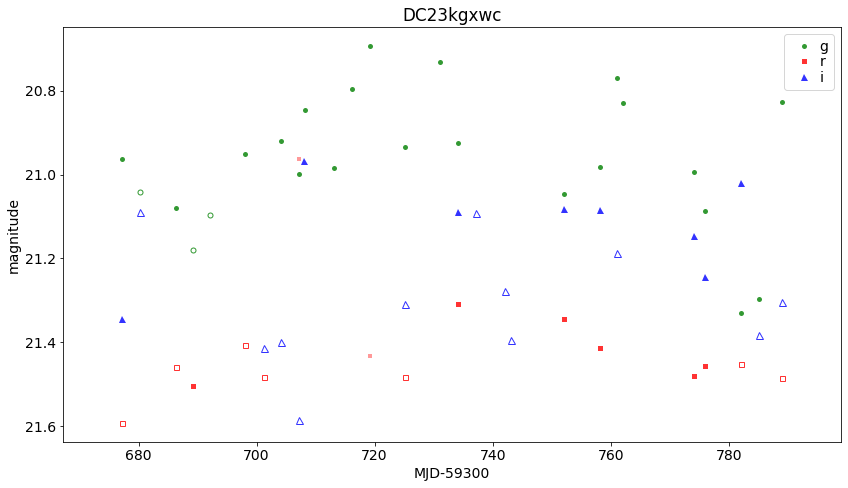

In [370]:
sx = np.where(paramLC_potsniip == 1)[0]
np.random.shuffle(sx)

# fig, ax = plt.subplots( 1, 1, figsize=(16,24), sharex=False, sharey=False )
plt.figure(figsize=(12,7))


s = 0
for i in range(1):
    plt.ylabel('magnitude', fontsize=14)
    for j in range(1):
        for f,filt in enumerate(all_filters):
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
            cx2 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
            plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
            plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f])
            plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                         all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
            if f == 0:
                xmin = 60000.
                xmax = 0.
                if (len(cx0) > 0):
                    xmin = np.min(candLC_mjd[cx0])
                    xmax = np.max(candLC_mjd[cx0])
                elif (len(cx0) > 0) & (len(cx1) > 0):
                    xmin = np.min([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
                    xmax = np.max([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
            elif f > 0:
                if (len(cx0) > 0):
                    xmin = np.min([xmin, np.min(candLC_mjd[cx0])])
                    xmax = np.max([xmax, np.min(candLC_mjd[cx0])])
                elif (len(cx0) > 0) & (len(cx1) > 0):
                    xmin = np.min([xmin, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                    xmax = np.max([xmax, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                
            del cx0, cx1, cx2
        plt.gca().invert_yaxis()
        plt.xlim([xmin-59300.-10, xmax-59300.+10])
        del xmin, xmax
        plt.title(paramLC_candid[sx[s]])
        s += 1

plt.legend(loc='upper right', labelspacing=0.1, handletextpad=0.1, fontsize=14)

for j in range(5):
    plt.xlabel('MJD-59300', fontsize=14)

plt.tight_layout()
plt.show()
del sx, s

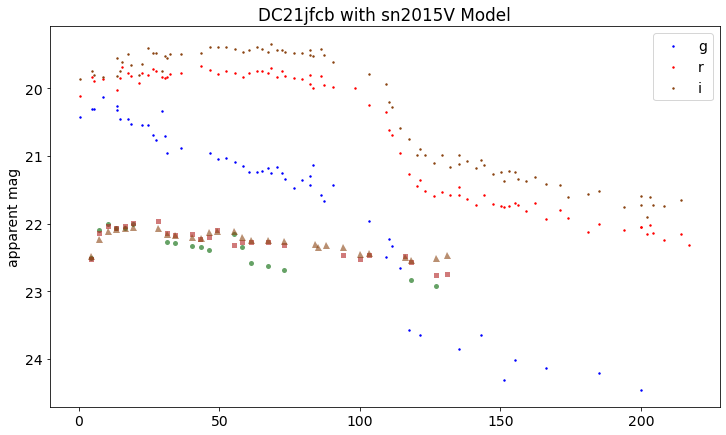

In [367]:
plt.figure(figsize=(12,7))
sx = np.where(paramLC_potsniip == 1)[0]

gsx = np.where((candLC_candid == paramLC_candid[sx][0]) & (candLC_filter == 'g'))
rsx = np.where((candLC_candid == paramLC_candid[sx][0]) & (candLC_filter == 'r'))
isx = np.where((candLC_candid == paramLC_candid[sx][0]) & (candLC_filter == 'i'))

plt.plot(candLC_mjd[gsx]-59958., candLC_mag[gsx], sym[0], ms=siz[0], mew=0, alpha=0.6, color=clr[0])
plt.plot(candLC_mjd[rsx]-59958., candLC_mag[rsx], sym[1], ms=siz[1], mew=0, alpha=0.6, color=clr[1])
plt.plot(candLC_mjd[isx]-59958., candLC_mag[isx], sym[2], ms=siz[2], mew=0, alpha=0.6, color=clr[2])
del gsx, rsx, isx

bsx = np.where(sn2015V_filter=='B')
rsx = np.where(sn2015V_filter=='R')
isx = np.where(sn2015V_filter=='I')
plt.scatter(sn2015V_mjd[bsx[0]]-57117,sn2015V_mag[bsx[0]]+4, c='blue', s=2, label='g')
plt.scatter(sn2015V_mjd[rsx[0]]-57117,sn2015V_mag[rsx[0]]+4, c='red', s=2, label='r')
plt.scatter(sn2015V_mjd[isx[0]]-57117,sn2015V_mag[isx[0]]+4, c='saddlebrown', s=2, label='i')
del bsx, rsx, isx

plt.ylabel('apparent mag')
plt.title('DC21jfcb with sn2015V Model')

ax=plt.gca()
ax.invert_yaxis()
plt.legend()
plt.show()

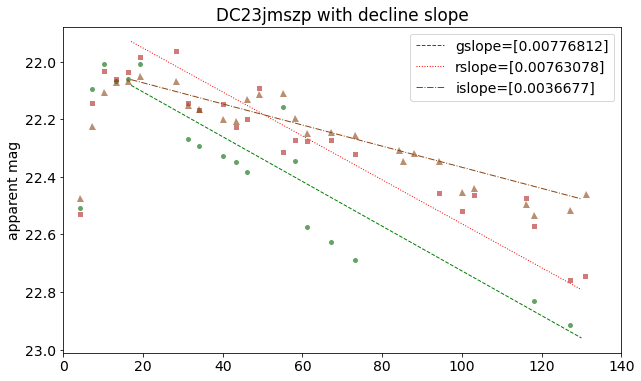

In [334]:
sx = np.where(paramLC_potsniip == 1)[0]

gsx = np.where((candLC_candid == paramLC_candid[sx][0]) & (candLC_filter == 'g'))
rsx = np.where((candLC_candid == paramLC_candid[sx][0]) & (candLC_filter == 'r'))
isx = np.where((candLC_candid == paramLC_candid[sx][0]) & (candLC_filter == 'i'))
plt.figure(figsize=(10,6))

plt.plot(candLC_mjd[gsx]-59958., candLC_mag[gsx], sym[0], ms=siz[0], mew=0, alpha=0.6, color=clr[0])
plt.plot(candLC_mjd[rsx]-59958., candLC_mag[rsx], sym[1], ms=siz[1], mew=0, alpha=0.6, color=clr[1])
plt.plot(candLC_mjd[isx]-59958., candLC_mag[isx], sym[2], ms=siz[2], mew=0, alpha=0.6, color=clr[2])
del gsx, rsx, isx

# gtx = np.where(dec_df['band']=='g')
# rtx = np.where(dec_df['band']=='r')
# itx = np.where(dec_df['band']=='i')
# plt.plot(dec_df['mjd'][gtx[0]]-57983,dec_df['mag'][gtx[0]]+1.5, c='green', label='g')
# plt.plot(dec_df['mjd'][rtx[0]]-57983,dec_df['mag'][rtx[0]]+2.5, c='red', label='r')
# plt.plot(dec_df['mjd'][itx[0]]-57983,dec_df['mag'][itx[0]]+3, c='brown', label='i')
# del gtx, rtx, itx

x = np.linspace(17,130, 2)
gy = [(gslope[sx]*(i))+ 21.95 for i in x]
ry = [(rslope[sx]*(i))+ 21.8 for i in x]
iy = [(islope[sx]*(i))+ 22.0 for i in x]
# slope, intercept = np.polyfit(x, y, 1)
# abline_values = [-slope * i + intercept for i in x]
plt.plot(x, gy, c='green', lw=1, ls='dashed', label =f'gslope={gslope[sx]}')
plt.plot(x, ry, c='red', lw=1, ls='dotted', label =f'rslope={rslope[sx]}')
plt.plot(x, iy, c='saddlebrown', lw=1, ls='dashdot', label =f'islope={islope[sx]}')
del x, gy, ry, iy, sx
plt.ylabel('apparent mag')
plt.title('DC23jmszp with decline slope')
plt.xlim(0, 140)
# plt.ylim(21.9,23)

plt.gca().invert_yaxis()
plt.legend()
plt.show()

### Save individual plots as PNG files

In [371]:
sx = np.where(paramLC_potsniip == 1)[0]
plt.rcParams.update({'font.size': 14})

for x in range(len(sx)):
    plt.figure(figsize=(8,6))
    
    for f,filt in enumerate(all_filters):
        cx0 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 0))[0]
        cx2 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4) & (candLC_lef == 1))[0]
        plt.plot(candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                 all_fshapes[f], ms=all_fsizes[f], mew=0, alpha=0.8, color=all_fcolors[f], label=filt)
        plt.plot(candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                 all_fshapes[f], ms=all_fsizes[f], mew=1, alpha=0.8, color='none', mec=all_fcolors[f], 
                 label=filt+' (R/B<0.4)')
        plt.plot(candLC_mjd[cx2]-59300., candLC_mag[cx2], 
                 all_fshapes[f], ms=all_fsizes[f]-1, mew=0, alpha=0.4, color=all_fcolors[f])
        if f == 0:
            xmin = 60000.
            xmax = 0.
            if (len(cx0) > 0):
                xmin = np.min(candLC_mjd[cx0])
                xmax = np.max(candLC_mjd[cx0])
            elif (len(cx0) > 0) & (len(cx1) > 0):
                xmin = np.min([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
                xmax = np.max([candLC_mjd[cx0], np.min(candLC_mjd[cx1])])
        elif f > 0:
            if (len(cx0) > 0):
                xmin = np.min([xmin, np.min(candLC_mjd[cx0])])
                xmax = np.max([xmax, np.min(candLC_mjd[cx0])])
            elif (len(cx0) > 0) & (len(cx1) > 0):
                xmin = np.min([xmin, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
                xmax = np.max([xmax, np.min(candLC_mjd[cx0]), np.min(candLC_mjd[cx1])])
        del cx0, cx1, cx2
    plt.gca().invert_yaxis()
    plt.title(paramLC_candid[sx[x]])
    plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    plt.xlim([xmin-59300.-5, xmax-59300.+5])
    del xmin, xmax
    plt.xlabel('MJD-59300', fontsize=14)
    plt.ylabel('mag', fontsize=14)
    plt.savefig('all_potential_sniip_plots/'+paramLC_candid[sx[x]]+'.png')
    plt.close()

del sx